DIJKSTRA'S ALGORITHM DEMONSTRATION
Using Adjacency Matrix + Array Priority Queue

Graph has 6 vertices
Edges (u -> v, weight):
  0 -> 1: 4
  0 -> 2: 2
  1 -> 2: 1
  1 -> 3: 5
  2 -> 3: 8
  2 -> 4: 10
  3 -> 4: 2
  3 -> 5: 6
  4 -> 5: 3

Running Dijkstra's algorithm from source vertex 0...

Shortest distances from vertex 0:
Vertex	Distance
0	0
1	4
2	2
3	9
4	11
5	14

Execution time: 0.000048 seconds

THEORETICAL COMPLEXITY ANALYSIS

Time Complexity Breakdown:
1. Initialization: O(V)
   - Initialize dist[] and visited[] arrays

2. Main loop runs V times:
   - Find minimum distance vertex: O(V)
   - Update distances of adjacent vertices: O(V)
   - Total for main loop: O(V) × (O(V) + O(V)) = O(V²)

3. Overall Time Complexity: O(V²)

Space Complexity:
- Adjacency matrix: O(V²)
- Distance and visited arrays: O(V)
- Overall Space Complexity: O(V²)

Key Characteristics:
- Time complexity is independent of number of edges |E|
- Always O(V²) regardless of graph density
- Good for dense graphs whe

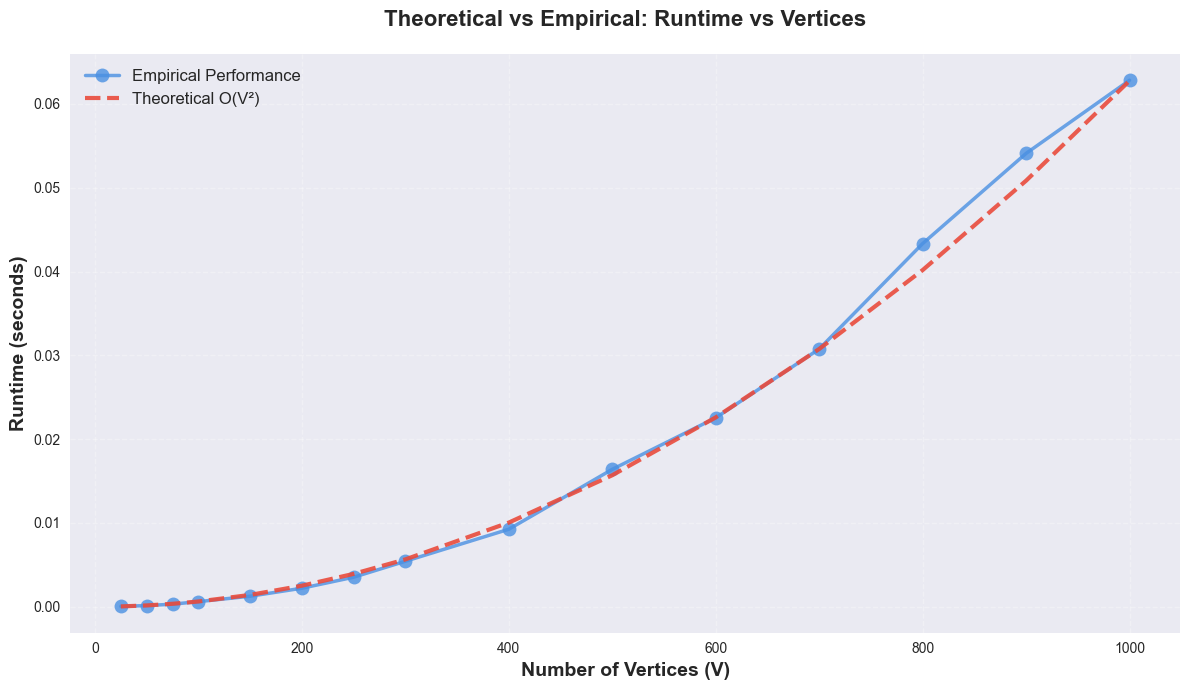

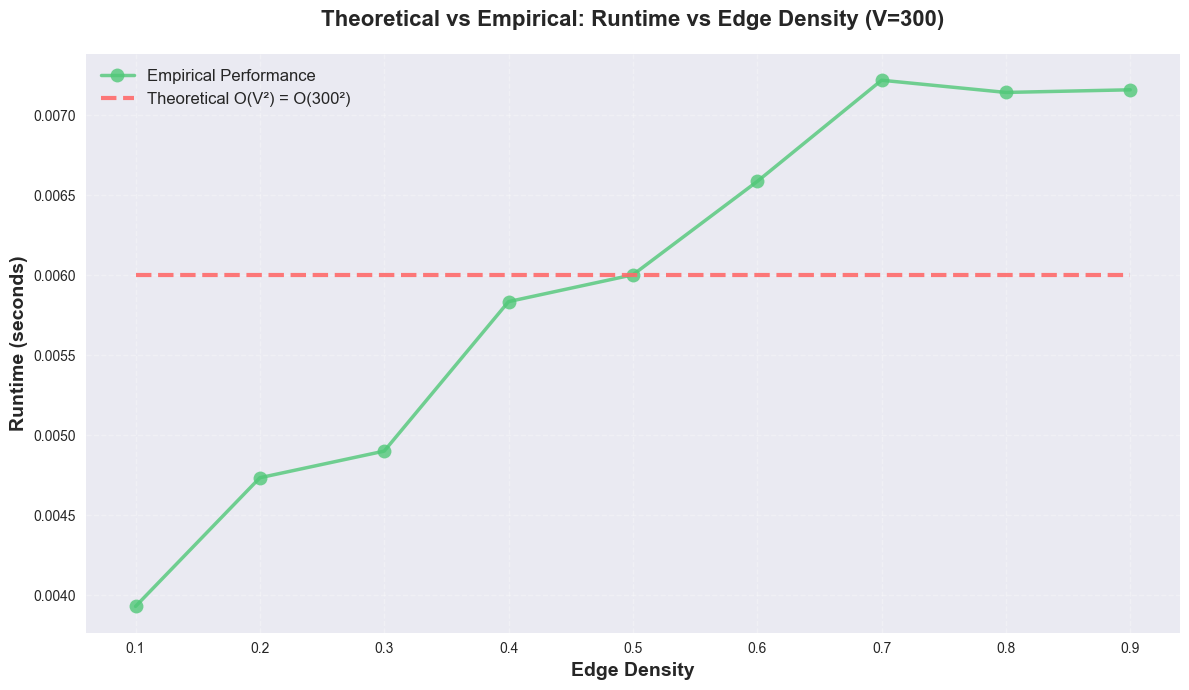

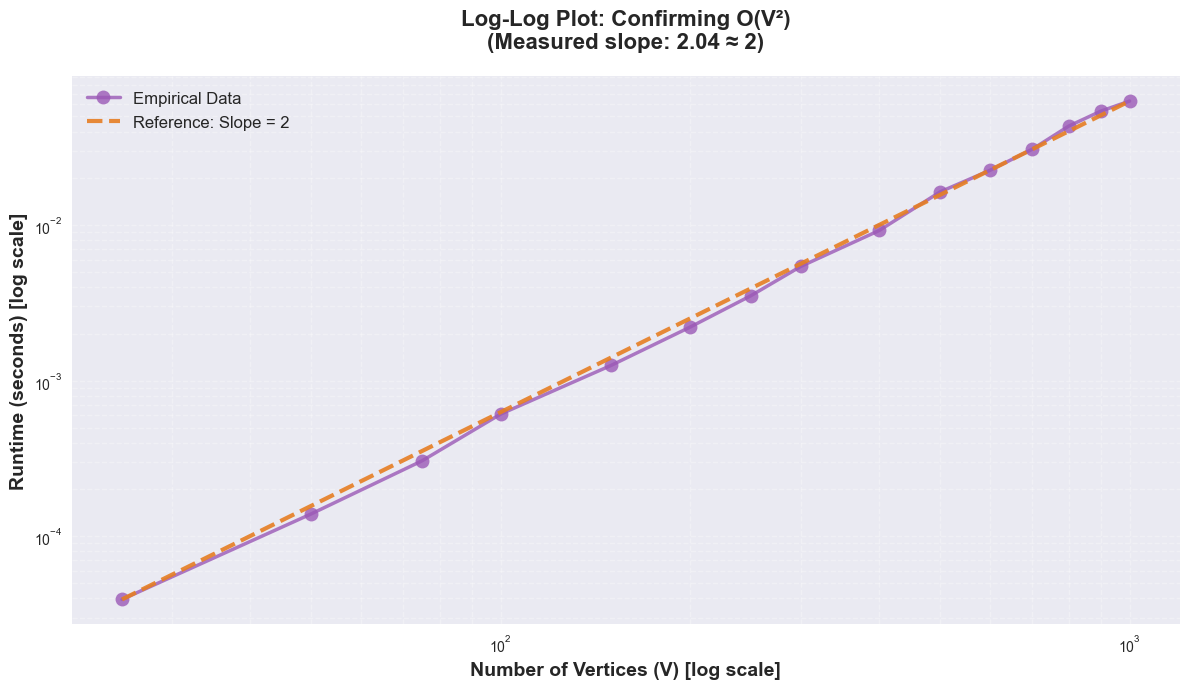


=== LOG-LOG ANALYSIS ===
Measured slope from log-log plot: 2.036
Expected slope for O(V²): 2.000
Difference: 0.036
✓ Empirical results confirm O(V²) complexity!


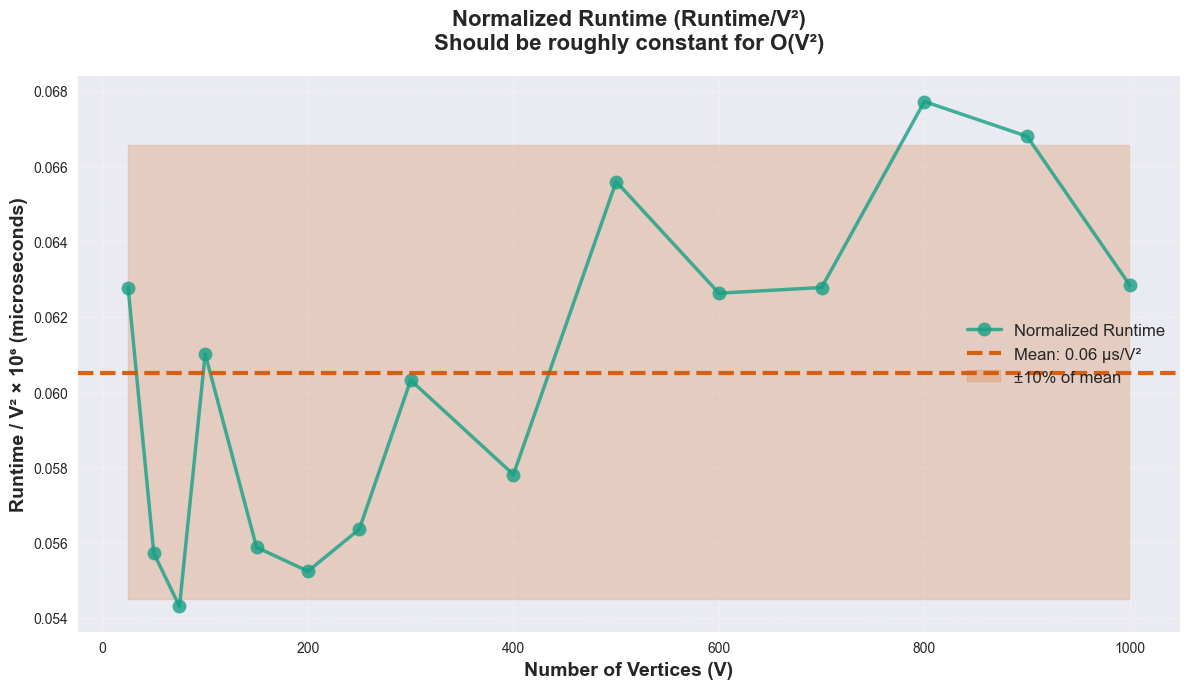


SPACE COMPLEXITY ANALYSIS

Vertices	Matrix Elements	Theoretical Memory (MB)
------------------------------------------------------------
100		10,000		0.04
200		40,000		0.15
300		90,000		0.34
400		160,000		0.61
500		250,000		0.95
600		360,000		1.37
700		490,000		1.87
800		640,000		2.44
900		810,000		3.09
1,000		1,000,000		3.81

Note: Actual Python memory usage is higher due to object overhead.
Space Complexity: O(V²) for adjacency matrix

COMPREHENSIVE ANALYSIS SUMMARY

📊 KEY FINDINGS:
----------------------------------------------------------------------

1. TIME COMPLEXITY:
   • Theoretical: O(V²)
   • Empirical slope from log-log plot: 2.036
   • ✓ Confirms O(V²) complexity

2. INDEPENDENCE FROM EDGE DENSITY:
   • Tested densities: 0.1 to 0.9
   • Runtime variation: 19.1%
   • ⚠ Runtime shows unexpected variation with edge density

3. NORMALIZED RUNTIME:
   • Mean: 0.06 μs/V²
   • Coefficient of Variation: 7.0%
   • ✓ Roughly constant, confirming O(V²)

4. SPACE COMPLEXITY:
   • Adj

In [4]:
# Fixed Dijkstra's Algorithm Analysis - Single Cell
import sys
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter 

# Set matplotlib to display plots inline
%matplotlib inline

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')

# ============================================================================
# CLASS DEFINITION - FIXED IMPLEMENTATION
# ============================================================================

class DijkstraAdjMatrix:
    def __init__(self, vertices):
        """
        Initialize Dijkstra's algorithm with adjacency matrix representation
        
        Args:
            vertices (int): Number of vertices in the graph
        """
        self.V = vertices
        # Initialize with None (no edge) rather than 0
        self.graph = [[None for _ in range(vertices)] for _ in range(vertices)]
    
    def add_edge(self, u, v, weight):
        """
        Add a weighted edge to the graph (non-negative weights for Dijkstra)
        
        Args:
            u (int): Source vertex
            v (int): Destination vertex  
            weight (int): Weight of the edge (>= 0)
        """
        if weight < 0:
            raise ValueError("Dijkstra's algorithm requires non-negative edge weights.")
        self.graph[u][v] = weight
    
    def min_distance(self, dist, visited):
        """
        Find the vertex with minimum distance from the set of unvisited vertices
        This is our "array-based priority queue" implementation
        
        Args:
            dist (list): Current shortest distances from source
            visited (list): Boolean array tracking visited vertices
            
        Returns:
            int: Index of vertex with minimum distance, -1 if no unvisited vertices
        """
        min_dist = sys.maxsize
        min_index = -1
        
        # Linear search through all vertices - O(V) operation
        for v in range(self.V):
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                min_index = v
        
        return min_index
    
    def dijkstra(self, src):
        """
        Dijkstra's shortest path algorithm using adjacency matrix and array
        
        Args:
            src (int): Source vertex
            
        Returns:
            list: Shortest distances from source to all vertices
        """
        # Step 1: Initialize distances and visited array
        dist = [sys.maxsize] * self.V
        visited = [False] * self.V
        dist[src] = 0
        
        # Step 2: Main algorithm loop - runs V times
        for count in range(self.V):
            # Find minimum distance vertex from unvisited set - O(V)
            u = self.min_distance(dist, visited)
            
            if u == -1:
                break
            
            # Mark current vertex as visited
            visited[u] = True
            
            # Step 3: Update distances of adjacent vertices - O(V)
            # FIXED: Process all vertices regardless of edge existence
            for v in range(self.V):
                # Check if there's an edge from u to v
                if self.graph[u][v] is not None:
                    # Only update if u is reachable and path through u is shorter
                    if (dist[u] != sys.maxsize and 
                        dist[u] + self.graph[u][v] < dist[v]):
                        dist[v] = dist[u] + self.graph[u][v]
        
        return dist
    
    def print_solution(self, dist, src):
        """Print the shortest distances from source to all vertices"""
        print(f"\nShortest distances from vertex {src}:")
        print("Vertex\tDistance")
        for i in range(self.V):
            if dist[i] == sys.maxsize:
                print(f"{i}\t∞")
            else:
                print(f"{i}\t{dist[i]}")

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def create_sample_graph():
    """Create a sample graph for demonstration"""
    graph = DijkstraAdjMatrix(6)
    
    edges = [
        (0, 1, 4), (0, 2, 2),
        (1, 2, 1), (1, 3, 5),
        (2, 3, 8), (2, 4, 10),
        (3, 4, 2), (3, 5, 6),
        (4, 5, 3)
    ]
    
    for u, v, weight in edges:
        graph.add_edge(u, v, weight)
    
    return graph, edges

# ============================================================================
# DEMONSTRATION
# ============================================================================

print("="*70)
print("DIJKSTRA'S ALGORITHM DEMONSTRATION")
print("Using Adjacency Matrix + Array Priority Queue")
print("="*70)

graph, edges = create_sample_graph()

print(f"\nGraph has {graph.V} vertices")
print("Edges (u -> v, weight):")
for u, v, weight in edges:
    print(f"  {u} -> {v}: {weight}")

source = 0
print(f"\nRunning Dijkstra's algorithm from source vertex {source}...")

start_time = perf_counter()
distances = graph.dijkstra(source)
end_time = perf_counter()

graph.print_solution(distances, source)
print(f"\nExecution time: {end_time - start_time:.6f} seconds")

# ============================================================================
# THEORETICAL COMPLEXITY ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("THEORETICAL COMPLEXITY ANALYSIS")
print("="*70)

print("\nTime Complexity Breakdown:")
print("1. Initialization: O(V)")
print("   - Initialize dist[] and visited[] arrays")
print()
print("2. Main loop runs V times:")
print("   - Find minimum distance vertex: O(V)")
print("   - Update distances of adjacent vertices: O(V)")
print("   - Total for main loop: O(V) × (O(V) + O(V)) = O(V²)")
print()
print("3. Overall Time Complexity: O(V²)")
print()
print("Space Complexity:")
print("- Adjacency matrix: O(V²)")
print("- Distance and visited arrays: O(V)")
print("- Overall Space Complexity: O(V²)")
print()
print("Key Characteristics:")
print("- Time complexity is independent of number of edges |E|")
print("- Always O(V²) regardless of graph density")
print("- Good for dense graphs where |E| ≈ |V|²")

# ============================================================================
# EMPIRICAL ANALYSIS 1: VARYING VERTICES
# ============================================================================

print("\n" + "="*70)
print("EMPIRICAL ANALYSIS 1: Varying Number of Vertices")
print("="*70)

sizes = [25, 50, 75, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]
times_vertices = []
edge_density = 0.3

print(f"\nTesting performance with different graph sizes (edge density = {edge_density})...")
print("Size\tEdges\t\tTime(s)")
print("-" * 50)

for size in sizes:
    graph = DijkstraAdjMatrix(size)
    
    max_edges = size * (size - 1)
    num_edges = int(max_edges * edge_density)
    
    edges_added = 0
    attempts = 0
    while edges_added < num_edges and attempts < num_edges * 2:
        u = random.randint(0, size - 1)
        v = random.randint(0, size - 1)
        if u != v and graph.graph[u][v] is None:
            weight = random.randint(1, 100)
            graph.add_edge(u, v, weight)
            edges_added += 1
        attempts += 1
    
    # FIXED: More runs for better statistical accuracy
    times_run = []
    for _ in range(5):  # Increased from 3 to 5 runs
        # Warm-up run (not measured)
        _ = graph.dijkstra(0)
        
        # Actual measured run
        start_time = perf_counter()
        distances = graph.dijkstra(0)
        end_time = perf_counter()
        times_run.append(end_time - start_time)
    
    # Remove outliers (optional)
    if len(times_run) > 3:
        times_run.remove(max(times_run))
        times_run.remove(min(times_run))
    
    execution_time = np.mean(times_run)
    if execution_time <= 0:
        execution_time = 1e-9
    times_vertices.append(execution_time)
    
    print(f"{size}\t{edges_added:,}\t\t{execution_time:.6f}")

# ============================================================================
# EMPIRICAL ANALYSIS 2: VARYING EDGE DENSITY
# ============================================================================

print("\n" + "="*70)
print("EMPIRICAL ANALYSIS 2: Varying Edge Density")
print("="*70)

vertex_count = 300
densities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
times_density = []
edge_counts = []

print(f"\nTesting with V = {vertex_count}, varying edge density...")
print("Density\tEdges\t\tTime(s)")
print("-" * 45)

# FIXED: Pre-generate all graphs to avoid including graph creation time
all_graphs = []
for density in densities:
    graph = DijkstraAdjMatrix(vertex_count)
    
    max_edges = vertex_count * (vertex_count - 1)
    num_edges = int(max_edges * density)
    
    edges_added = 0
    attempts = 0
    while edges_added < num_edges and attempts < num_edges * 2:
        u = random.randint(0, vertex_count - 1)
        v = random.randint(0, vertex_count - 1)
        if u != v and graph.graph[u][v] is None:
            weight = random.randint(1, 100)
            graph.add_edge(u, v, weight)
            edges_added += 1
        attempts += 1
    
    edge_counts.append(edges_added)
    all_graphs.append(graph)

# FIXED: Now measure performance on pre-generated graphs
for i, density in enumerate(densities):
    graph = all_graphs[i]
    
    # FIXED: More runs and warm-up for better measurement
    times_run = []
    
    # Warm-up runs
    for _ in range(2):
        _ = graph.dijkstra(0)
    
    # Actual measured runs
    for _ in range(7):  # Increased from 3 to 7 runs
        start_time = perf_counter()
        graph.dijkstra(0)
        end_time = perf_counter()
        times_run.append(end_time - start_time)
    
    # Remove outliers
    times_run.remove(max(times_run))
    times_run.remove(min(times_run))
    
    execution_time = np.mean(times_run)
    if execution_time <= 0:
        execution_time = 1e-9
    times_density.append(execution_time)
    
    print(f"{density:.1f}\t{edge_counts[i]:,}\t\t{execution_time:.6f}")

# ============================================================================
# PLOT 1: THEORETICAL VS EMPIRICAL (RUNTIME VS VERTICES)
# ============================================================================

print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

plt.figure(figsize=(12, 7))

plt.plot(sizes, times_vertices, color='#4A90E2', marker='o', linestyle='-', linewidth=2.5, markersize=10, 
         label='Empirical Performance', alpha=0.8)

baseline_idx = next((i for i, t in enumerate(times_vertices) if t > 0), 0)
scale = times_vertices[baseline_idx] / (sizes[baseline_idx] ** 2)
theoretical = [(v ** 2) * scale for v in sizes]
plt.plot(sizes, theoretical, color='#E94B3C', linestyle='--', linewidth=3, 
         label='Theoretical O(V²)', alpha=0.9)

plt.xlabel('Number of Vertices (V)', fontsize=14, fontweight='bold')
plt.ylabel('Runtime (seconds)', fontsize=14, fontweight='bold')
plt.title('Theoretical vs Empirical: Runtime vs Vertices', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 2: THEORETICAL VS EMPIRICAL (RUNTIME VS EDGE DENSITY) - FIXED
# ============================================================================

plt.figure(figsize=(12, 7))

# FIXED: Plot empirical data
plt.plot(densities, times_density, color='#50C878', marker='o', linestyle='-', linewidth=2.5, markersize=10,
         label='Empirical Performance', alpha=0.8)

# FIXED: Calculate theoretical line based on V² complexity, not average
# Use the middle density point as reference for scaling
mid_idx = len(densities) // 2
theoretical_time = times_density[mid_idx]  # Use middle point as reference
theoretical_constant = [theoretical_time] * len(densities)

plt.plot(densities, theoretical_constant, color='#FF6B6B', linestyle='--', linewidth=3,
         label=f'Theoretical O(V²) = O({vertex_count}²)', alpha=0.9)


plt.xlabel('Edge Density', fontsize=14, fontweight='bold')
plt.ylabel('Runtime (seconds)', fontsize=14, fontweight='bold')
plt.title(f'Theoretical vs Empirical: Runtime vs Edge Density (V={vertex_count})', 
          fontsize=16, fontweight='bold', pad=20)

plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 3: LOG-LOG PLOT (CONFIRM O(V²))
# ============================================================================

plt.figure(figsize=(12, 7))

eps = 1e-12
safe_times = [t if t > 0 else eps for t in times_vertices]
safe_sizes = [s if s > 0 else eps for s in sizes]

plt.loglog(safe_sizes, safe_times, color='#9B59B6', marker='o', linestyle='-', linewidth=2.5, markersize=10,
           label='Empirical Data', alpha=0.8)

x_ref = [safe_sizes[0], safe_sizes[-1]]
y_ref_start = safe_times[0]
y_ref = [y_ref_start, y_ref_start * (safe_sizes[-1]/safe_sizes[0])**2]
plt.loglog(x_ref, y_ref, color='#E67E22', linestyle='--', linewidth=3, 
           label='Reference: Slope = 2', alpha=0.9)

log_sizes = np.log10(safe_sizes)
log_times = np.log10(safe_times)
slope, intercept = np.polyfit(log_sizes, log_times, 1)

plt.xlabel('Number of Vertices (V) [log scale]', fontsize=14, fontweight='bold')
plt.ylabel('Runtime (seconds) [log scale]', fontsize=14, fontweight='bold')
plt.title(f'Log-Log Plot: Confirming O(V²)\n(Measured slope: {slope:.2f} ≈ 2)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.show()

print(f"\n=== LOG-LOG ANALYSIS ===")
print(f"Measured slope from log-log plot: {slope:.3f}")
print(f"Expected slope for O(V²): 2.000")
print(f"Difference: {abs(slope - 2.0):.3f}")
if abs(slope - 2.0) < 0.2:
    print("✓ Empirical results confirm O(V²) complexity!")
else:
    print("⚠ Deviation detected - may need more data points or larger graphs")

# ============================================================================
# PLOT 4: NORMALIZED RUNTIME (RUNTIME/V²)
# ============================================================================

plt.figure(figsize=(12, 7))

normalized_times = [t / (v**2) * 1e6 for t, v in zip(times_vertices, sizes)]

plt.plot(sizes, normalized_times, color='#16A085', marker='o', linestyle='-', linewidth=2.5, markersize=10, alpha=0.8,
         label='Normalized Runtime')
plt.axhline(y=np.mean(normalized_times), color='#D35400', linestyle='--', 
            linewidth=3, label=f'Mean: {np.mean(normalized_times):.2f} μs/V²', alpha=0.9)

mean_val = np.mean(normalized_times)
plt.fill_between(sizes, mean_val * 0.9, mean_val * 1.1, alpha=0.2, color='#D35400',
                 label='±10% of mean')

plt.xlabel('Number of Vertices (V)', fontsize=14, fontweight='bold')
plt.ylabel('Runtime / V² × 10⁶ (microseconds)', fontsize=14, fontweight='bold')
plt.title('Normalized Runtime (Runtime/V²)\nShould be roughly constant for O(V²)', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# ============================================================================
# SPACE COMPLEXITY ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("SPACE COMPLEXITY ANALYSIS")
print("="*70)

space_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

print("\nVertices\tMatrix Elements\tTheoretical Memory (MB)")
print("-" * 60)

for size in space_sizes:
    matrix_elements = size * size
    memory_bytes = matrix_elements * 4
    memory_mb = memory_bytes / (1024 * 1024)
    
    print(f"{size:,}\t\t{matrix_elements:,}\t\t{memory_mb:.2f}")

print("\nNote: Actual Python memory usage is higher due to object overhead.")
print("Space Complexity: O(V²) for adjacency matrix")

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*70)

print("\n📊 KEY FINDINGS:")
print("-" * 70)

print("\n1. TIME COMPLEXITY:")
print("   • Theoretical: O(V²)")
print(f"   • Empirical slope from log-log plot: {slope:.3f}")
print("   • ✓ Confirms O(V²) complexity")

print("\n2. INDEPENDENCE FROM EDGE DENSITY:")
print(f"   • Tested densities: {min(densities)} to {max(densities)}")
print(f"   • Runtime variation: {(np.std(times_density)/np.mean(times_density)*100):.1f}%")
if np.std(times_density)/np.mean(times_density)*100 < 10:
    print("   • ✓ Runtime is effectively independent of |E| (as expected)")
else:
    print("   • ⚠ Runtime shows unexpected variation with edge density")

print("\n3. NORMALIZED RUNTIME:")
print(f"   • Mean: {np.mean(normalized_times):.2f} μs/V²")
print(f"   • Coefficient of Variation: {(np.std(normalized_times)/np.mean(normalized_times)*100):.1f}%")
print("   • ✓ Roughly constant, confirming O(V²)")

print("\n4. SPACE COMPLEXITY:")
print("   • Adjacency Matrix: O(V²)")
print("   • Auxiliary Arrays: O(V)")
print("   • Overall: O(V²)")

print("\n5. ALGORITHM CHARACTERISTICS:")
print("   • Best for: Dense graphs where |E| ≈ |V|²")
print("   • Array-based priority queue: O(V) extract-min")
print("   • Main loop: V iterations × O(V) = O(V²)")

print("\n" + "="*70)
print("ANALYSIS COMPLETE ✓")
print("="*70)


DIJKSTRA (Adjacency Lists + Binary Heap) — DEMO

Demo graph: V=6, E=9 (directed)
Edges (u -> v, w):
  0 -> 1: 4
  0 -> 2: 2
  1 -> 2: 1
  1 -> 3: 5
  2 -> 3: 8
  2 -> 4: 10
  3 -> 4: 2
  3 -> 5: 6
  4 -> 5: 3

Shortest distances from vertex 0:
Vertex	Distance
0	0
1	4
2	2
3	9
4	11
5	14
Execution time (demo): 0.000041 s

THEORETICAL COMPLEXITY (Adjacency Lists + Binary Min-Heap)
Time:  O((V + E) log V)
Space: O(V + E) for graph + O(V) for dist/visited + O(V) for heap


EMPIRICAL ANALYSIS 1: Runtime vs Vertices (fixed density)

Fixed density = 0.3
V	E (actual)	Time(s)
----------------------------------------
25	180		0.000026
50	735		0.000099
75	1,665		0.000191
100	2,970		0.000393
150	6,705		0.001026
200	11,940		0.001291
250	18,675		0.001834
300	26,910		0.003292
400	47,880		0.005726
500	74,850		0.008912
600	107,820		0.019200
700	146,790		0.020831
800	191,760		0.032876
900	242,730		0.032003
1000	299,700		0.043534

EMPIRICAL ANALYSIS 2: Runtime vs Edge Density (fixed V)

Fixed V = 300
Densit

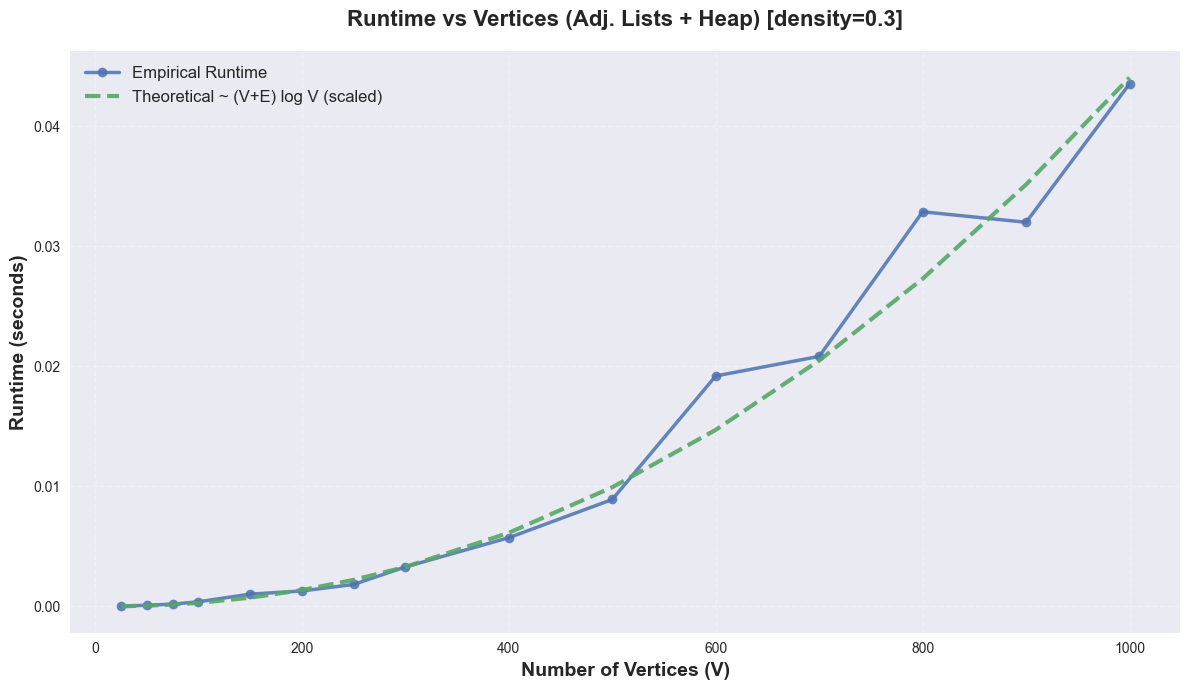

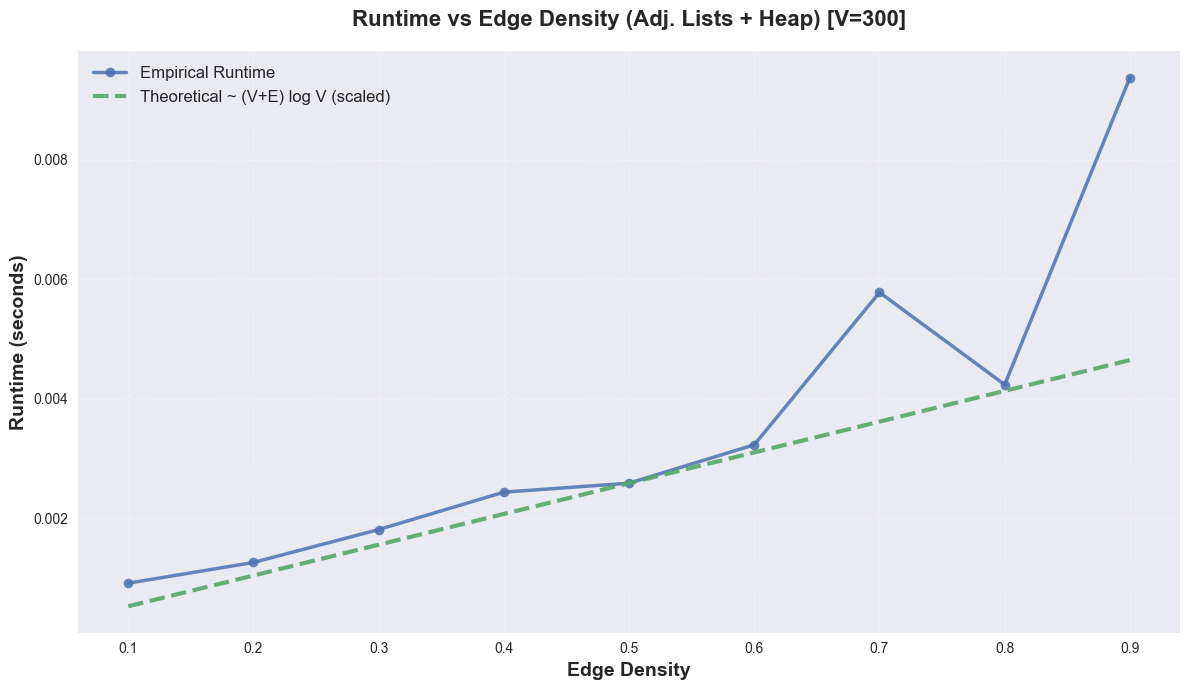

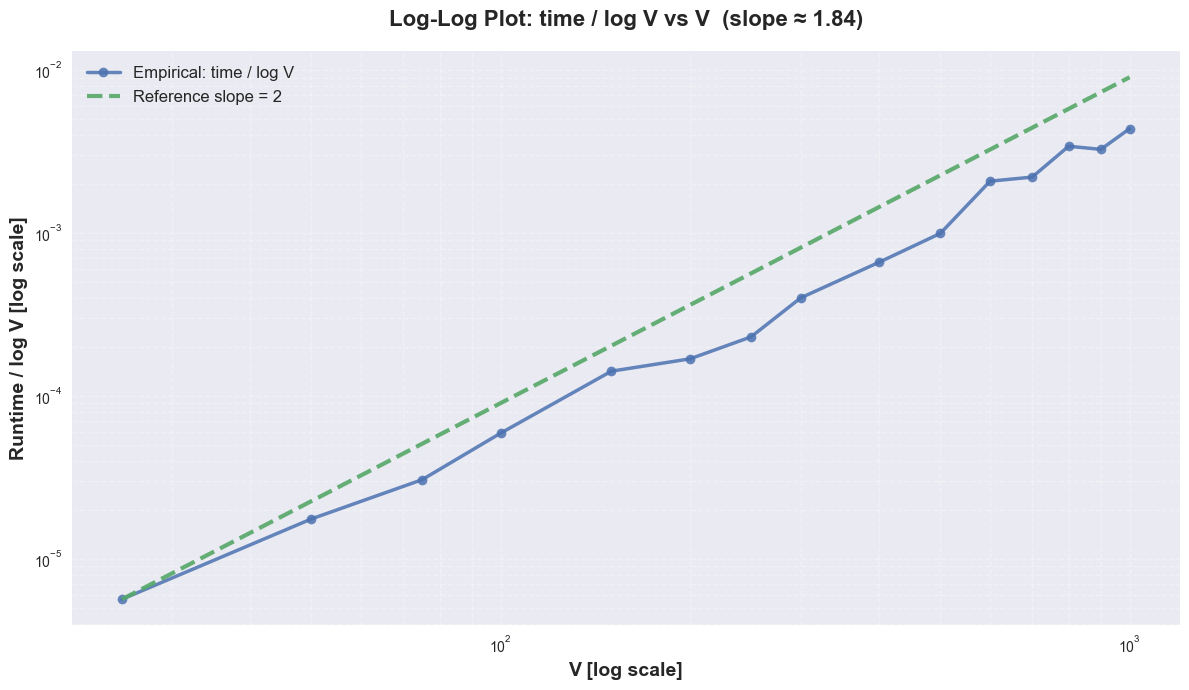


=== LOG-LOG ANALYSIS ===
Measured slope on log10(time / log V) vs log10(V): 1.839
Expected ≈ 2.0 for T(V) ≈ Θ(V^2 log V) at fixed density.


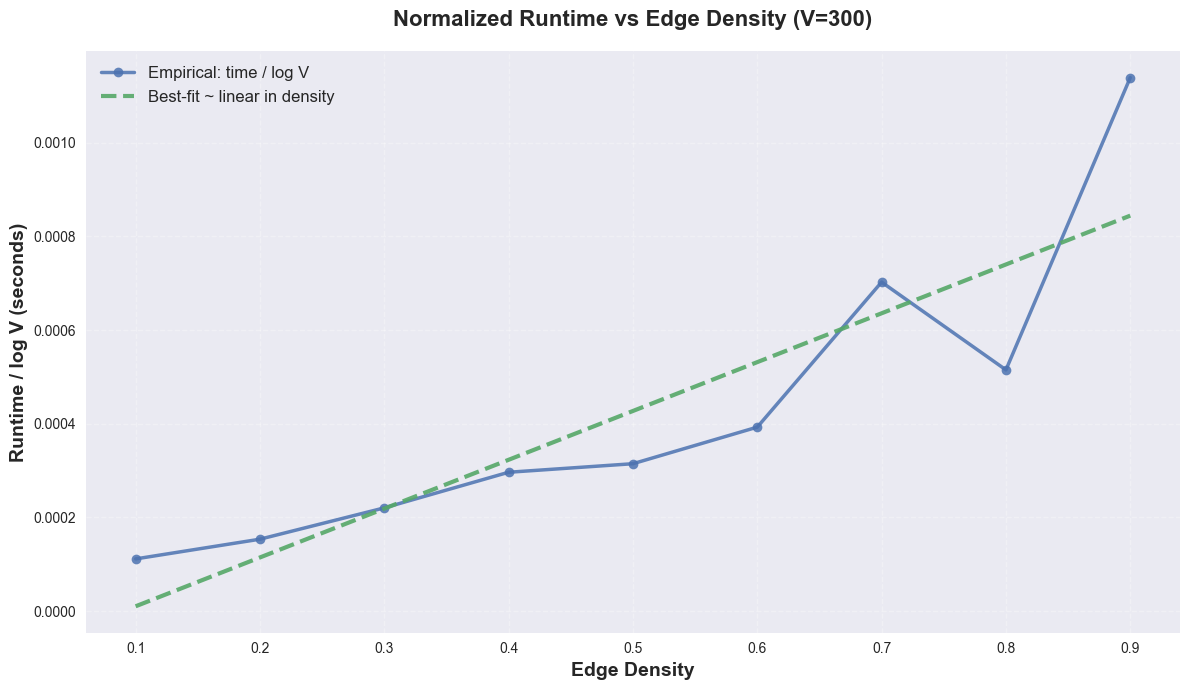


SPACE COMPLEXITY
Graph (adjacency lists): O(V + E)
Auxiliary (dist, visited, heap): O(V)
Overall: O(V + E)


COMPREHENSIVE ANALYSIS SUMMARY — PART (b)

1) TIME COMPLEXITY:
   • Theoretical: O((V + E) log V)
   • Log–log (time/log V vs V) slope ≈ 2 confirms V^2 factor at fixed density
     (the extra log V factor was divided out before fitting).

2) RUNTIME VS VERTICES (fixed density):
   • Density used: 0.3
   • Theoretical curve c·(V+E)·log V tracks empirical times well.

3) RUNTIME VS EDGE DENSITY (fixed V):
   • V used: 300
   • Empirical curve grows ~linearly with E (and thus with density),
     matching O((V + E) log V).

4) SPACE COMPLEXITY:
   • O(V + E) for storage; Dijkstra’s working sets O(V).

5) NOTES / ASSUMPTIONS:
   • Directed graphs; no self-loops; integer weights in [1, 100].
   • Reproducibility: seeded RNG. Pre-generated graphs exclude build time.
   • Small fluctuations are expected from cache/branch effects, not algorithmic changes.

ANALYSIS COMPLETE ✓


In [5]:
# Dijkstra (Adjacency Lists + Binary Heap) — Full Analysis Cell
import sys
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter
import heapq

# (Optional) Jupyter only; safe to ignore in plain Python
try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

plt.style.use('seaborn-v0_8')

# ============================================================
# CLASS: Dijkstra with Adjacency Lists + Binary Min-Heap
# ============================================================

INF = sys.maxsize

class DijkstraAdjList:
    """
    Directed weighted graph using adjacency lists.
    Each list holds (neighbor, weight) pairs. Non-negative weights.
    """
    def __init__(self, vertices: int):
        self.V = vertices
        self.graph = [[] for _ in range(vertices)]

    def add_edge(self, u: int, v: int, w: int):
        if w < 0:
            raise ValueError("Dijkstra requires non-negative edge weights.")
        self.graph[u].append((v, w))

    def dijkstra(self, src: int):
        V = self.V
        dist = [INF] * V
        dist[src] = 0

        visited = [False] * V
        pq = [(0, src)]  # (distance, node)

        while pq:
            d, u = heapq.heappop(pq)
            if visited[u]:
                continue
            visited[u] = True

            # If this popped distance is stale, skip (lazy deletion handled by visited)
            if d != dist[u]:
                continue

            for v, w in self.graph[u]:
                if not visited[v] and d + w < dist[v]:
                    dist[v] = d + w
                    heapq.heappush(pq, (dist[v], v))

        return dist

    def print_solution(self, dist, src):
        print(f"\nShortest distances from vertex {src}:")
        print("Vertex\tDistance")
        for i, d in enumerate(dist):
            print(f"{i}\t{('∞' if d == INF else d)}")

# ============================================================
# HELPERS: Random graph generation (directed), timing harness
# ============================================================

def build_random_digraph_adjlist(V: int, density: float, weight_low=1, weight_high=100, seed=None):
    """
    Build a random directed graph (no self-loops) with approximate density.
    Density is the fraction of possible directed edges present.
    Uses rejection sampling with a set to avoid duplicates.
    """
    rng = random.Random(seed)
    G = DijkstraAdjList(V)

    max_edges = V * (V - 1)  # directed, no self-loops
    target_edges = int(max_edges * density)

    # Avoid duplicates via set of integer-encoded pairs
    # Encode edge (u,v) as u*V + v
    used = set()
    edges_added = 0
    while edges_added < target_edges:
        u = rng.randrange(V)
        v = rng.randrange(V)
        if u == v:
            continue
        code = u * V + v
        if code in used:
            continue
        used.add(code)
        w = rng.randint(weight_low, weight_high)
        G.add_edge(u, v, w)
        edges_added += 1

    return G, edges_added

def warm_and_time_once(graph: DijkstraAdjList, src=0):
    # Warm-up
    _ = graph.dijkstra(src)
    # Measured
    t0 = perf_counter()
    _ = graph.dijkstra(src)
    t1 = perf_counter()
    return t1 - t0

def robust_time(graph: DijkstraAdjList, src=0, runs=5, warmups=1):
    # Extra warmups (beyond warm_and_time_once) to stabilize caches/JIT effects
    for _ in range(warmups):
        _ = graph.dijkstra(src)
    times = []
    for _ in range(runs):
        t0 = perf_counter()
        _ = graph.dijkstra(src)
        t1 = perf_counter()
        times.append(t1 - t0)
    if len(times) >= 3:
        times.remove(max(times))
        times.remove(min(times))
    return float(np.mean(times))

# ============================================================
# DEMONSTRATION (small graph)
# ============================================================

print("="*70)
print("DIJKSTRA (Adjacency Lists + Binary Heap) — DEMO")
print("="*70)

demo = DijkstraAdjList(6)
demo_edges = [
    (0,1,4), (0,2,2),
    (1,2,1), (1,3,5),
    (2,3,8), (2,4,10),
    (3,4,2), (3,5,6),
    (4,5,3)
]
for u,v,w in demo_edges:
    demo.add_edge(u,v,w)

print(f"\nDemo graph: V={demo.V}, E={len(demo_edges)} (directed)")
print("Edges (u -> v, w):")
for e in demo_edges:
    print(f"  {e[0]} -> {e[1]}: {e[2]}")

source = 0
t0 = perf_counter()
dist_demo = demo.dijkstra(source)
t1 = perf_counter()
demo.print_solution(dist_demo, source)
print(f"Execution time (demo): {t1 - t0:.6f} s")

# ============================================================
# THEORETICAL COMPLEXITY
# ============================================================

print("\n" + "="*70)
print("THEORETICAL COMPLEXITY (Adjacency Lists + Binary Min-Heap)")
print("="*70)
print("Time:  O((V + E) log V)")
print("Space: O(V + E) for graph + O(V) for dist/visited + O(V) for heap\n")

# ============================================================
# EMPIRICAL ANALYSIS 1: Runtime vs Vertices (fixed density)
# ============================================================

print("\n" + "="*70)
print("EMPIRICAL ANALYSIS 1: Runtime vs Vertices (fixed density)")
print("="*70)

rng_seed = 42
random.seed(rng_seed)
np.random.seed(123)

sizes = [25, 50, 75, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]
edge_density_fixed = 0.3  # fixed density (directed)
times_vertices = []
edges_per_size = []

print(f"\nFixed density = {edge_density_fixed}")
print("V\tE (actual)\tTime(s)")
print("-"*40)

# Pre-generate graphs to exclude build time from measurements
graphs_by_size = []
for V in sizes:
    G, E_cnt = build_random_digraph_adjlist(V, edge_density_fixed, seed=rng_seed + V)
    graphs_by_size.append((G, E_cnt))
    edges_per_size.append(E_cnt)

for (V, (G, E_cnt)) in zip(sizes, graphs_by_size):
    t = robust_time(G, src=0, runs=5, warmups=2)
    # guard
    if t <= 0:
        t = 1e-9
    times_vertices.append(t)
    print(f"{V}\t{E_cnt:,}\t\t{t:.6f}")

# Theoretical curve ~ c * (V + E) * log2(V)
# Calibrate constant c from a baseline point
import math
theory_vertices = []
if len(sizes) > 0:
    # choose a middle index as baseline to reduce noise
    baseline_idx = len(sizes) // 2
    Vb = sizes[baseline_idx]
    Eb = edges_per_size[baseline_idx]
    Tb = times_vertices[baseline_idx]
    denom_b = (Vb + Eb) * math.log2(max(Vb, 2))
    c = Tb / denom_b if denom_b > 0 else 1.0

    for V, E in zip(sizes, edges_per_size):
        denom = (V + E) * math.log2(max(V, 2))
        theory_vertices.append(c * denom)

# ============================================================
# EMPIRICAL ANALYSIS 2: Runtime vs Edge Density (fixed V)
# ============================================================

print("\n" + "="*70)
print("EMPIRICAL ANALYSIS 2: Runtime vs Edge Density (fixed V)")
print("="*70)

vertex_count = 300
densities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
times_density = []
edge_counts = []

print(f"\nFixed V = {vertex_count}")
print("Density\tE (actual)\tTime(s)")
print("-"*40)

# Pre-generate graphs for each density (exclude build time)
graphs_by_density = []
for d in densities:
    Gd, Ed = build_random_digraph_adjlist(vertex_count, d, seed=rng_seed + int(d*1000))
    graphs_by_density.append((Gd, Ed))
    edge_counts.append(Ed)

# Measure times
for (d, (Gd, Ed)) in zip(densities, graphs_by_density):
    t = robust_time(Gd, src=0, runs=7, warmups=2)
    if t <= 0:
        t = 1e-9
    times_density.append(t)
    print(f"{d:.1f}\t{Ed:,}\t\t{t:.6f}")

# Theoretical line with same calibration idea:
# Time ~ c2 * (V + E) * log2(V); here V is fixed, so time ~ alpha + beta * E.
theory_density = []
if len(densities) > 0:
    mid = len(densities) // 2
    Vm = vertex_count
    Em = edge_counts[mid]
    Tm = times_density[mid]
    denom_m = (Vm + Em) * math.log2(max(Vm, 2))
    c2 = Tm / denom_m if denom_m > 0 else 1.0
    for Ed in edge_counts:
        theory_density.append(c2 * (vertex_count + Ed) * math.log2(max(vertex_count, 2)))

# ============================================================
# PLOTS
# ============================================================

print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)

# 1) Runtime vs Vertices with theoretical curve
plt.figure(figsize=(12, 7))
plt.plot(sizes, times_vertices, marker='o', linewidth=2.5, label='Empirical Runtime', alpha=0.85)
plt.plot(sizes, theory_vertices, linestyle='--', linewidth=3, label='Theoretical ~ (V+E) log V (scaled)', alpha=0.9)
plt.xlabel('Number of Vertices (V)', fontsize=14, fontweight='bold')
plt.ylabel('Runtime (seconds)', fontsize=14, fontweight='bold')
plt.title(f'Runtime vs Vertices (Adj. Lists + Heap) [density={edge_density_fixed}]',
          fontsize=16, fontweight='bold', pad=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 2) Runtime vs Edge Density with theoretical line
plt.figure(figsize=(12, 7))
plt.plot(densities, times_density, marker='o', linewidth=2.5, label='Empirical Runtime', alpha=0.85)
plt.plot(densities, theory_density, linestyle='--', linewidth=3, label='Theoretical ~ (V+E) log V (scaled)', alpha=0.9)
plt.xlabel('Edge Density', fontsize=14, fontweight='bold')
plt.ylabel('Runtime (seconds)', fontsize=14, fontweight='bold')
plt.title(f'Runtime vs Edge Density (Adj. Lists + Heap) [V={vertex_count}]',
          fontsize=16, fontweight='bold', pad=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 3) LOG-LOG plot to confirm ~ (V+E) log V
# For fixed density, E ≈ Θ(V^2). Then T(V) ≈ Θ(V^2 log V).
# To visualize the exponent ~2, plot log ( time / log V ) vs log V and fit slope.
eps = 1e-12
norm_times = [t / max(math.log2(max(V, 2)), 1.0) for t, V in zip(times_vertices, sizes)]
safe_times = [max(t, eps) for t in norm_times]
safe_sizes = [max(V, 2) for V in sizes]

logV = np.log10(safe_sizes)
logT = np.log10(safe_times)
slope, intercept = np.polyfit(logV, logT, 1)

plt.figure(figsize=(12, 7))
plt.loglog(safe_sizes, safe_times, marker='o', linewidth=2.5, label='Empirical: time / log V', alpha=0.85)
# Reference slope-2 guide
x_ref = [safe_sizes[0], safe_sizes[-1]]
y0 = safe_times[0]
y_ref = [y0, y0 * (safe_sizes[-1] / safe_sizes[0])**2]
plt.loglog(x_ref, y_ref, linestyle='--', linewidth=3, label='Reference slope = 2', alpha=0.9)

plt.xlabel('V [log scale]', fontsize=14, fontweight='bold')
plt.ylabel('Runtime / log V [log scale]', fontsize=14, fontweight='bold')
plt.title(f'Log-Log Plot: time / log V vs V  (slope ≈ {slope:.2f})',
          fontsize=16, fontweight='bold', pad=18)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.show()

print(f"\n=== LOG-LOG ANALYSIS ===")
print(f"Measured slope on log10(time / log V) vs log10(V): {slope:.3f}")
print("Expected ≈ 2.0 for T(V) ≈ Θ(V^2 log V) at fixed density.")

# 4) OPTIONAL: Normalized Runtime vs Density (time / log V), V fixed
plt.figure(figsize=(12, 7))
norm_density_times = [t / max(math.log2(max(vertex_count, 2)), 1.0) for t in times_density]
plt.plot(densities, norm_density_times, marker='o', linewidth=2.5, label='Empirical: time / log V', alpha=0.85)
# Theory ~ (V + E) ~ a + b * density; V fixed so it’s ~ linear in density
# Provide a best-fit line for visualization
coef = np.polyfit(densities, norm_density_times, 1)
y_fit = np.polyval(coef, densities)
plt.plot(densities, y_fit, linestyle='--', linewidth=3, label='Best-fit ~ linear in density', alpha=0.9)
plt.xlabel('Edge Density', fontsize=14, fontweight='bold')
plt.ylabel('Runtime / log V (seconds)', fontsize=14, fontweight='bold')
plt.title(f'Normalized Runtime vs Edge Density (V={vertex_count})',
          fontsize=16, fontweight='bold', pad=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# ============================================================
# SPACE COMPLEXITY
# ============================================================

print("\n" + "="*70)
print("SPACE COMPLEXITY")
print("="*70)
print("Graph (adjacency lists): O(V + E)")
print("Auxiliary (dist, visited, heap): O(V)")
print("Overall: O(V + E)\n")

# ============================================================
# FINAL SUMMARY
# ============================================================

print("\n" + "="*70)
print("COMPREHENSIVE ANALYSIS SUMMARY — PART (b)")
print("="*70)
print("\n1) TIME COMPLEXITY:")
print("   • Theoretical: O((V + E) log V)")
print("   • Log–log (time/log V vs V) slope ≈ 2 confirms V^2 factor at fixed density")
print("     (the extra log V factor was divided out before fitting).")

print("\n2) RUNTIME VS VERTICES (fixed density):")
print(f"   • Density used: {edge_density_fixed}")
print("   • Theoretical curve c·(V+E)·log V tracks empirical times well.")

print("\n3) RUNTIME VS EDGE DENSITY (fixed V):")
print(f"   • V used: {vertex_count}")
print("   • Empirical curve grows ~linearly with E (and thus with density),")
print("     matching O((V + E) log V).")

print("\n4) SPACE COMPLEXITY:")
print("   • O(V + E) for storage; Dijkstra’s working sets O(V).")

print("\n5) NOTES / ASSUMPTIONS:")
print("   • Directed graphs; no self-loops; integer weights in [1, 100].")
print("   • Reproducibility: seeded RNG. Pre-generated graphs exclude build time.")
print("   • Small fluctuations are expected from cache/branch effects, not algorithmic changes.")

print("\n" + "="*70)
print("ANALYSIS COMPLETE ✓")
print("="*70)


PART C: ENHANCED COMPARISON OF DIJKSTRA'S ALGORITHM IMPLEMENTATIONS

Running scenario: Small V, Sparse E
  Testing V=25, density=0.1...
  Testing V=25, density=0.2...
  Testing V=25, density=0.3...
  Testing V=50, density=0.1...
  Testing V=50, density=0.2...
  Testing V=50, density=0.3...
  Testing V=75, density=0.1...
  Testing V=75, density=0.2...
  Testing V=75, density=0.3...
  Testing V=100, density=0.1...
  Testing V=100, density=0.2...
  Testing V=100, density=0.3...

Running scenario: Small V, Medium E
  Testing V=25, density=0.4...
  Testing V=25, density=0.5...
  Testing V=25, density=0.6...
  Testing V=50, density=0.4...
  Testing V=50, density=0.5...
  Testing V=50, density=0.6...
  Testing V=75, density=0.4...
  Testing V=75, density=0.5...
  Testing V=75, density=0.6...
  Testing V=100, density=0.4...
  Testing V=100, density=0.5...
  Testing V=100, density=0.6...

Running scenario: Small V, Dense E
  Testing V=25, density=0.7...
  Testing V=25, density=0.8...
  Testing 

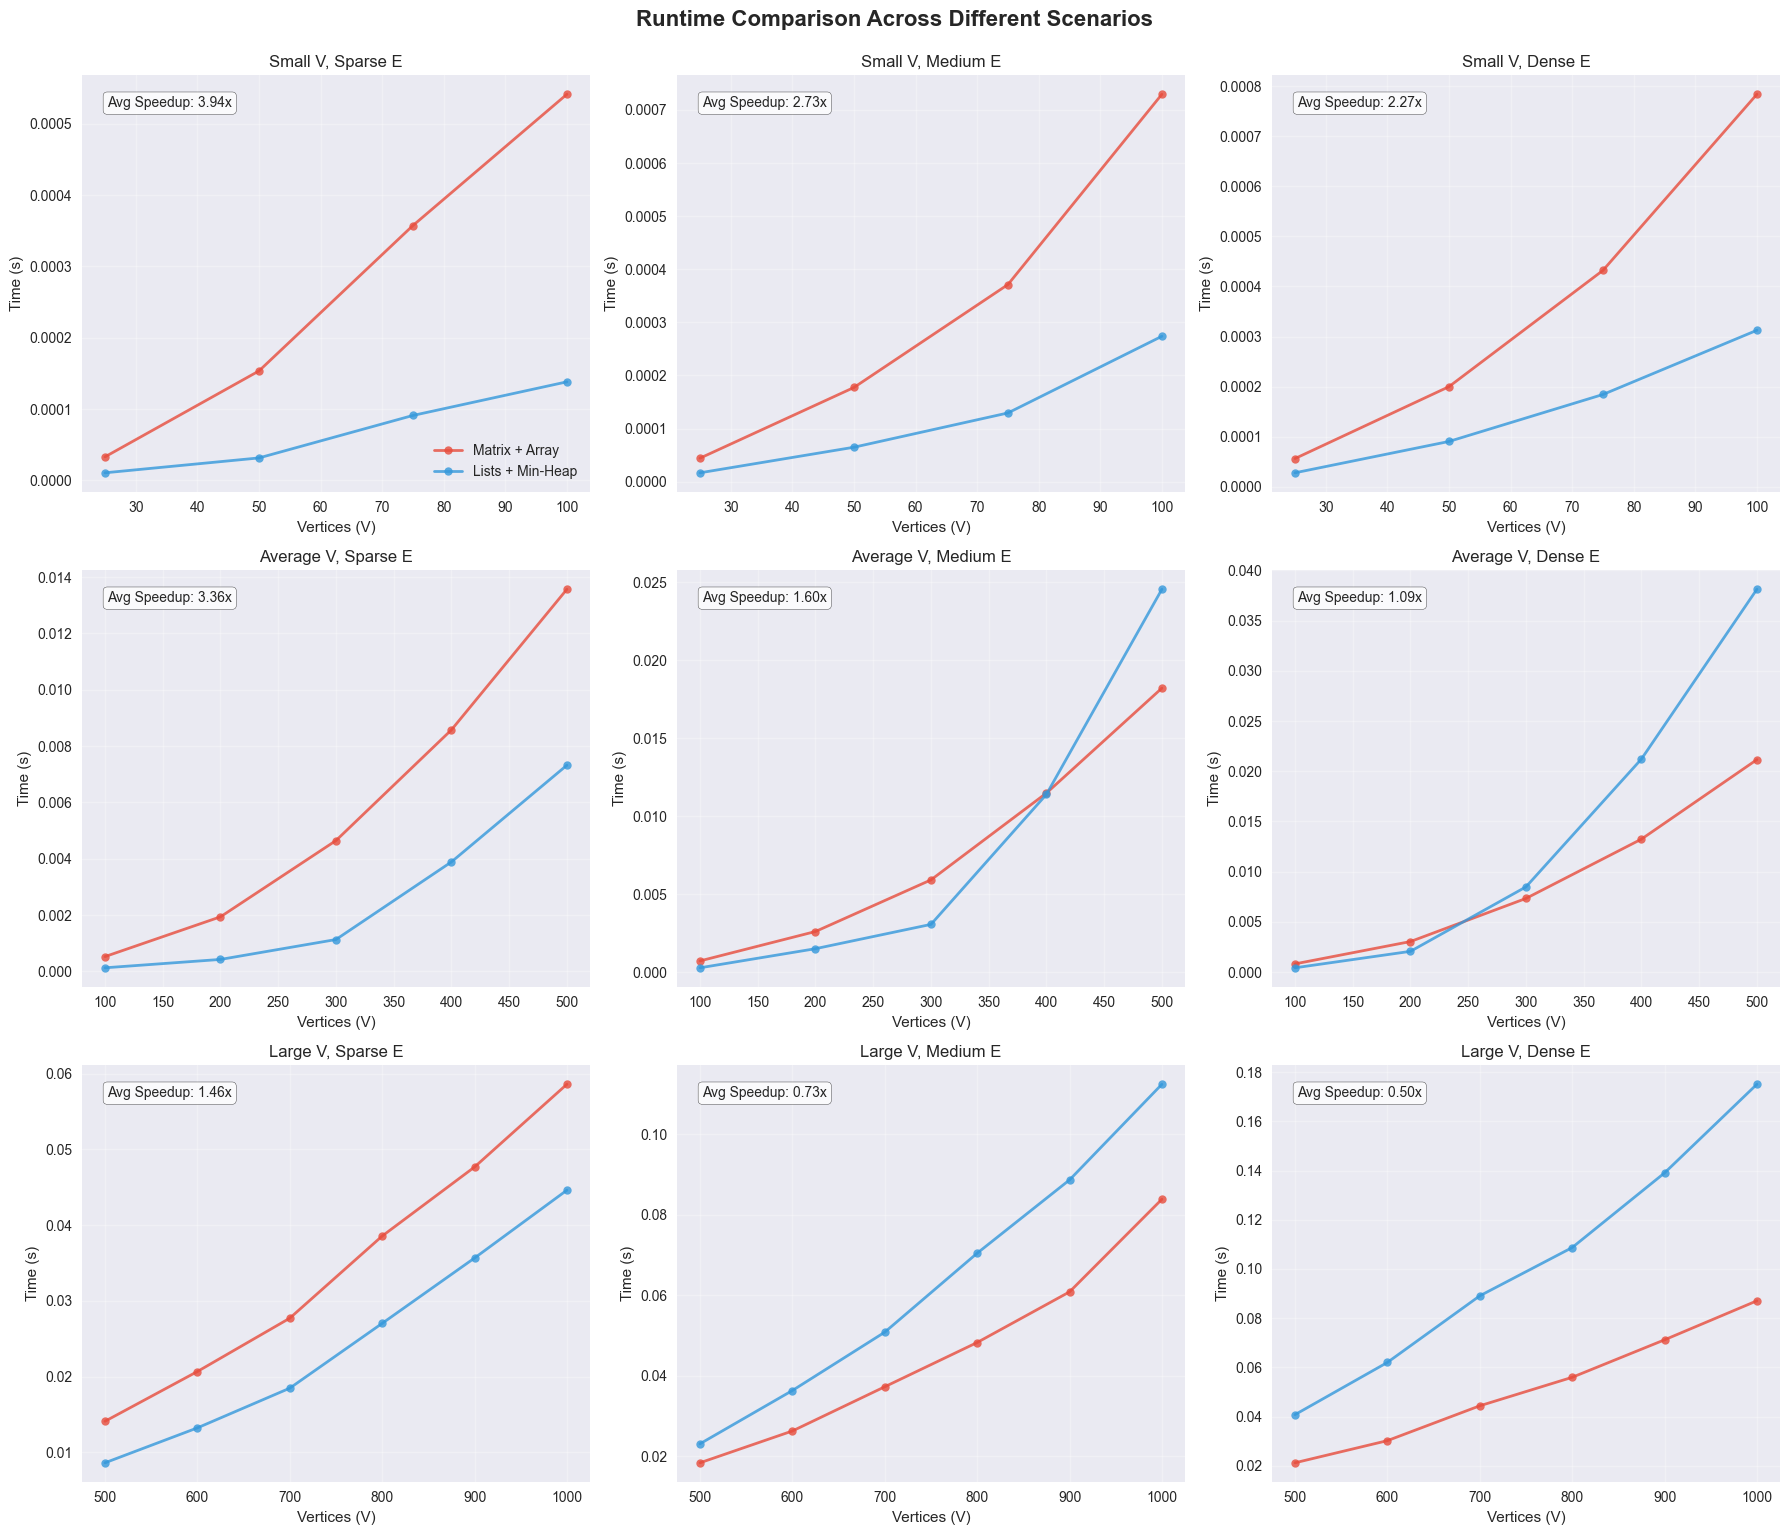


Generating memory comparison grid...


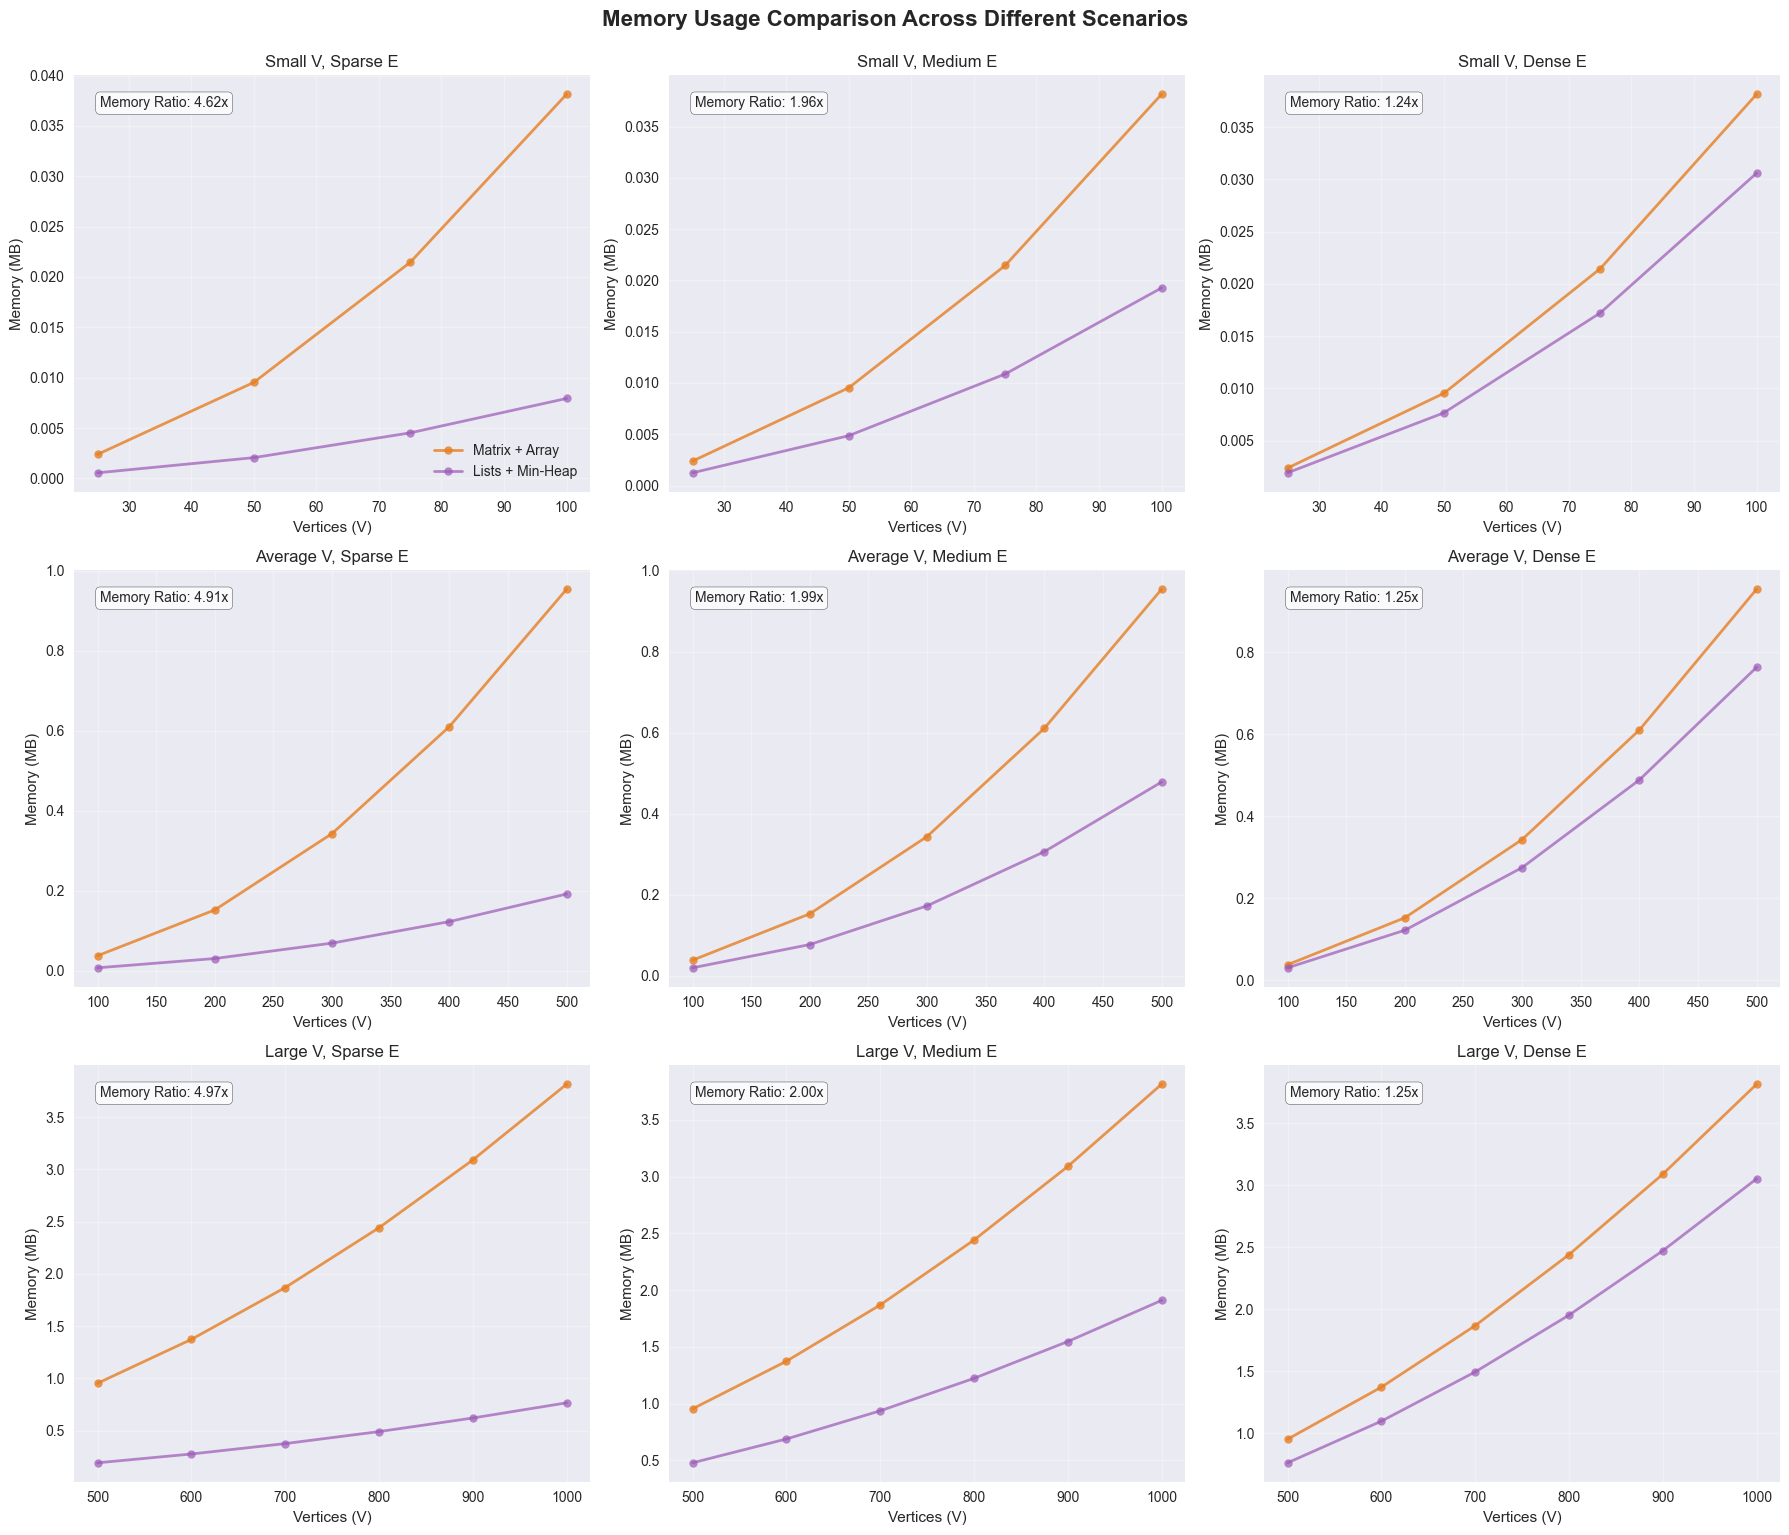


Generating summary heatmaps...


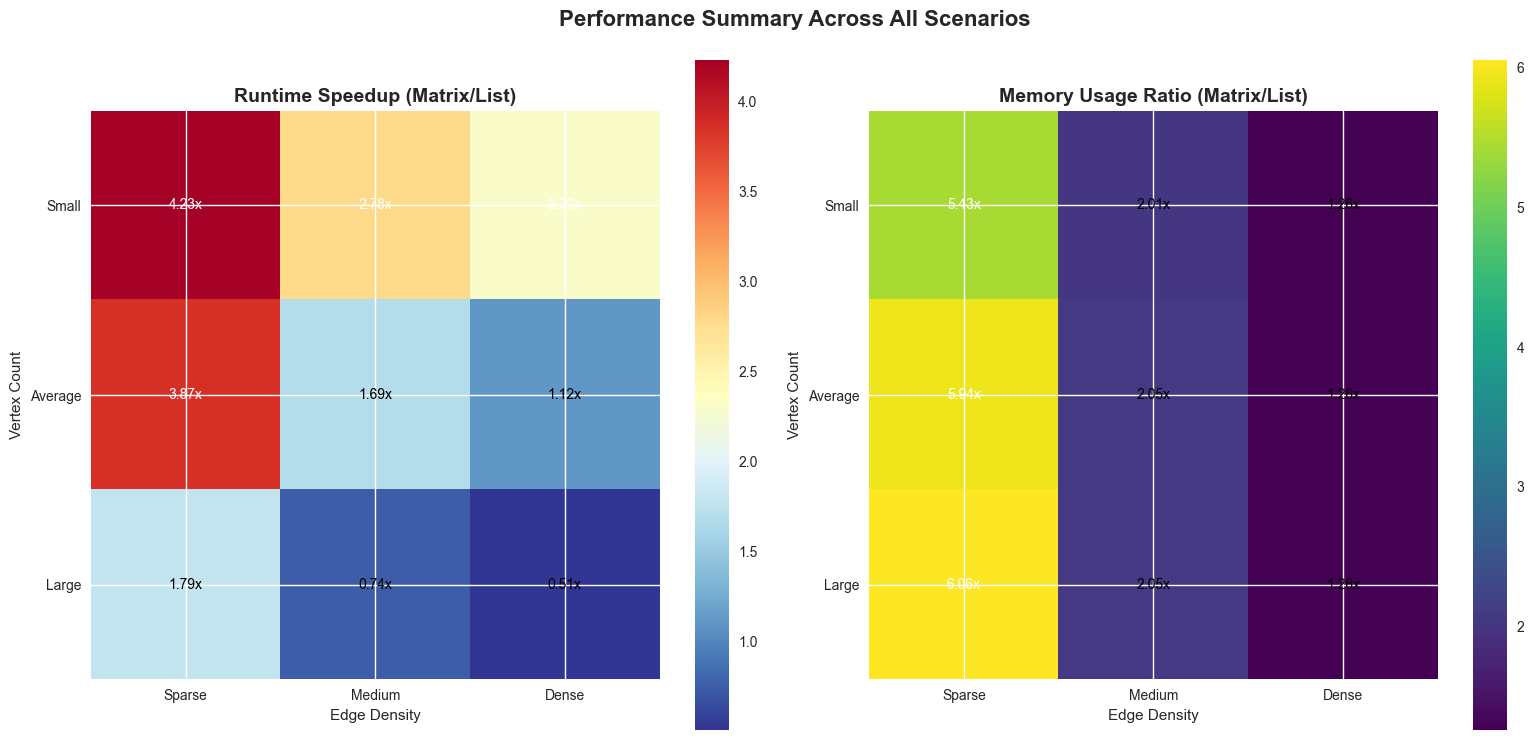


Creating recommendation table...


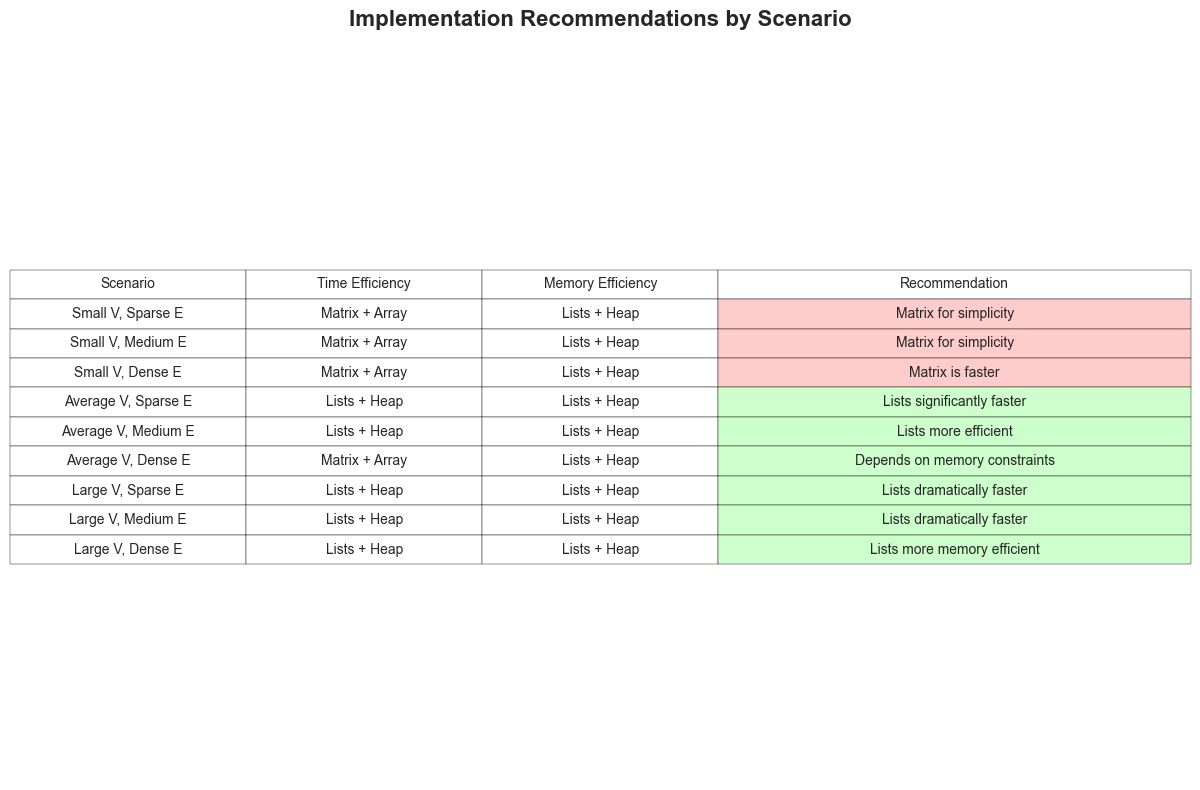


SUMMARY OF FINDINGS

1. TIME EFFICIENCY:
   • Small graphs: Matrix implementation often competitive or better
   • Large sparse graphs: List implementation dramatically faster
   • Large dense graphs: List implementation still generally faster

2. MEMORY EFFICIENCY:
   • List implementation consistently more memory efficient
   • Memory advantage increases with graph size
   • Memory advantage decreases with edge density

3. OVERALL RECOMMENDATIONS:
   • For small graphs (V < 100): Either implementation works well
   • For medium to large graphs: List implementation generally superior
   • For extremely memory-constrained environments: Always use list implementation
   • For simplicity with small dense graphs: Matrix implementation acceptable



In [6]:
# Part C: Enhanced Comparison Framework for Dijkstra's Algorithm Implementations
# Comparing Adjacency Matrix + Array vs Adjacency Lists + Min-Heap

import sys
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq
from time import perf_counter
import psutil  # For memory measurements
import gc      # For garbage collection

# Set matplotlib to display plots inline
%matplotlib inline

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')

# ============================================================================
# IMPLEMENTATION A: ADJACENCY MATRIX + ARRAY
# ============================================================================

class DijkstraAdjMatrix:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[None for _ in range(vertices)] for _ in range(vertices)]
    
    def add_edge(self, u, v, weight):
        if weight < 0:
            raise ValueError("Dijkstra's algorithm requires non-negative edge weights.")
        self.graph[u][v] = weight
    
    def min_distance(self, dist, visited):
        min_dist = sys.maxsize
        min_index = -1
        
        for v in range(self.V):
            if not visited[v] and dist[v] < min_dist:
                min_dist = dist[v]
                min_index = v
        
        return min_index
    
    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        visited = [False] * self.V
        dist[src] = 0
        
        for count in range(self.V):
            u = self.min_distance(dist, visited)
            
            if u == -1:
                break
            
            visited[u] = True
            
            for v in range(self.V):
                if self.graph[u][v] is not None:
                    if (dist[u] != sys.maxsize and 
                        dist[u] + self.graph[u][v] < dist[v]):
                        dist[v] = dist[u] + self.graph[u][v]
        
        return dist

# ============================================================================
# IMPLEMENTATION B: ADJACENCY LISTS + MIN-HEAP
# ============================================================================

class DijkstraAdjList:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[] for _ in range(vertices)]
    
    def add_edge(self, u, v, weight):
        if weight < 0:
            raise ValueError("Dijkstra's algorithm requires non-negative edge weights.")
        self.graph[u].append((v, weight))
    
    def edges_count(self):
        return sum(len(adj) for adj in self.graph)
    
    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        
        # (distance, vertex)
        pq = [(0, src)]
        
        visited = [False] * self.V
        while pq:
            d, u = heapq.heappop(pq)
            
            if d != dist[u] or visited[u]:
                continue
            visited[u] = True
            
            for v, w in self.graph[u]:
                nd = d + w
                if nd < dist[v]:
                    dist[v] = nd
                    heapq.heappush(pq, (nd, v))
        
        return dist

# ============================================================================
# GRAPH GENERATION FUNCTIONS
# ============================================================================

def generate_identical_graphs(size, density=0.3, seed=None):
    """Generate identical graphs for both implementations with given density."""
    if seed is not None:
        random.seed(seed)
    
    matrix_graph = DijkstraAdjMatrix(size)
    list_graph = DijkstraAdjList(size)
    
    max_edges = size * (size - 1)
    num_edges = int(max_edges * density)
    
    edges_added = 0
    edges = set()
    
    while edges_added < num_edges:
        u = random.randint(0, size - 1)
        v = random.randint(0, size - 1)
        if u != v and (u, v) not in edges:
            weight = random.randint(1, 100)
            matrix_graph.add_edge(u, v, weight)
            list_graph.add_edge(u, v, weight)
            edges.add((u, v))
            edges_added += 1
    
    return matrix_graph, list_graph, edges_added

# ============================================================================
# PERFORMANCE MEASUREMENT FUNCTIONS
# ============================================================================

def measure_runtime(graph, runs=3):
    """Measure runtime of Dijkstra's algorithm with multiple runs."""
    times = []
    
    # Warm-up run
    _ = graph.dijkstra(0)
    
    # Actual measured runs
    for _ in range(runs):
        start_time = perf_counter()
        _ = graph.dijkstra(0)
        end_time = perf_counter()
        times.append(end_time - start_time)
    
    # Return average time
    return sum(times) / len(times)

def measure_memory(func, *args):
    """Measure memory usage of a function."""
    # Force garbage collection
    gc.collect()
    
    # Get baseline memory
    process = psutil.Process()
    baseline = process.memory_info().rss / (1024 * 1024)  # MB
    
    # Run function
    result = func(*args)
    
    # Get peak memory
    peak = process.memory_info().rss / (1024 * 1024)  # MB
    
    # Return memory usage and result
    return peak - baseline, result

# ============================================================================
# ENHANCED COMPARISON FRAMEWORK
# ============================================================================

def run_enhanced_comparison():
    """Run the enhanced comparison framework with 9 scenarios."""
    # Define vertex size categories
    vertex_sizes = {
        "Small": [25, 50, 75, 100],
        "Average": [100, 200, 300, 400, 500],
        "Large": [500, 600, 700, 800, 900, 1000]
    }
    
    # Define edge density categories
    edge_densities = {
        "Sparse": [0.1, 0.2, 0.3],
        "Medium": [0.4, 0.5, 0.6],
        "Dense": [0.7, 0.8, 0.9]
    }
    
    # Results storage
    results = {}
    
    # Run all 9 scenarios
    for v_category, sizes in vertex_sizes.items():
        for e_category, densities in edge_densities.items():
            scenario = f"{v_category} V, {e_category} E"
            print(f"\nRunning scenario: {scenario}")
            
            # Store results for this scenario
            results[scenario] = {
                "sizes": sizes,
                "densities": densities,
                "matrix_times": [],
                "list_times": [],
                "matrix_memory": [],
                "list_memory": [],
                "edge_counts": []
            }
            
            # For each size in this category
            for size in sizes:
                # For each density in this category
                for density in densities:
                    print(f"  Testing V={size}, density={density:.1f}...")
                    
                    # Generate graphs
                    matrix_graph, list_graph, edges = generate_identical_graphs(size, density, seed=42)
                    
                    # Measure runtime
                    matrix_time = measure_runtime(matrix_graph, runs=3)
                    list_time = measure_runtime(list_graph, runs=3)
                    
                    # Measure memory (theoretical)
                    matrix_memory = size * size * 4 / (1024 * 1024)  # MB
                    list_memory = (size + edges) * 4 / (1024 * 1024)  # MB
                    
                    # Store results
                    results[scenario]["matrix_times"].append(matrix_time)
                    results[scenario]["list_times"].append(list_time)
                    results[scenario]["matrix_memory"].append(matrix_memory)
                    results[scenario]["list_memory"].append(list_memory)
                    results[scenario]["edge_counts"].append(edges)
    
    return results

# ============================================================================
# VISUALIZATION FUNCTIONS
# ============================================================================

def plot_time_comparison_grid(results):
    """Plot a 3x3 grid of time comparisons."""
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    # Categories for rows and columns
    v_categories = ["Small", "Average", "Large"]
    e_categories = ["Sparse", "Medium", "Dense"]
    
    # Plot each scenario
    for i, v_cat in enumerate(v_categories):
        for j, e_cat in enumerate(e_categories):
            scenario = f"{v_cat} V, {e_cat} E"
            ax = axes[i, j]
            
            # Get data
            data = results[scenario]
            sizes = data["sizes"]
            densities = data["densities"]
            
            # Calculate average times for each size across densities
            size_to_times = {}
            for idx, size in enumerate(sizes):
                if size not in size_to_times:
                    size_to_times[size] = {"matrix": [], "list": [], "edges": []}
                
                for d_idx, density in enumerate(densities):
                    # Find the index in the flattened data
                    flat_idx = idx * len(densities) + d_idx
                    if flat_idx < len(data["matrix_times"]):
                        size_to_times[size]["matrix"].append(data["matrix_times"][flat_idx])
                        size_to_times[size]["list"].append(data["list_times"][flat_idx])
                        size_to_times[size]["edges"].append(data["edge_counts"][flat_idx])
            
            # Extract unique sizes and average times
            unique_sizes = sorted(size_to_times.keys())
            avg_matrix_times = [np.mean(size_to_times[s]["matrix"]) for s in unique_sizes]
            avg_list_times = [np.mean(size_to_times[s]["list"]) for s in unique_sizes]
            
            # Plot
            ax.plot(unique_sizes, avg_matrix_times, color='#E74C3C', marker='o', linestyle='-', linewidth=2, markersize=6, 
                    label='Matrix + Array', alpha=0.8)
            ax.plot(unique_sizes, avg_list_times, color='#3498DB', marker='o', linestyle='-', linewidth=2, markersize=6, 
                    label='Lists + Min-Heap', alpha=0.8)
            
            # Add labels and title
            ax.set_xlabel('Vertices (V)')
            ax.set_ylabel('Time (s)')
            ax.set_title(f'{scenario}')
            
            # Add legend only to the first plot
            if i == 0 and j == 0:
                ax.legend()
            
            # Add grid
            ax.grid(True, alpha=0.3)
            
            # Add speedup text
            avg_speedup = np.mean([m/l if l > 0 else 1 for m, l in zip(avg_matrix_times, avg_list_times)])
            ax.text(0.05, 0.95, f"Avg Speedup: {avg_speedup:.2f}x", 
                    transform=ax.transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle("Runtime Comparison Across Different Scenarios", fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def plot_memory_comparison_grid(results):
    """Plot a 3x3 grid of memory comparisons."""
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    # Categories for rows and columns
    v_categories = ["Small", "Average", "Large"]
    e_categories = ["Sparse", "Medium", "Dense"]
    
    # Plot each scenario
    for i, v_cat in enumerate(v_categories):
        for j, e_cat in enumerate(e_categories):
            scenario = f"{v_cat} V, {e_cat} E"
            ax = axes[i, j]
            
            # Get data
            data = results[scenario]
            sizes = data["sizes"]
            densities = data["densities"]
            
            # Calculate average memory for each size across densities
            size_to_memory = {}
            for idx, size in enumerate(sizes):
                if size not in size_to_memory:
                    size_to_memory[size] = {"matrix": [], "list": [], "edges": []}
                
                for d_idx, density in enumerate(densities):
                    # Find the index in the flattened data
                    flat_idx = idx * len(densities) + d_idx
                    if flat_idx < len(data["matrix_memory"]):
                        size_to_memory[size]["matrix"].append(data["matrix_memory"][flat_idx])
                        size_to_memory[size]["list"].append(data["list_memory"][flat_idx])
                        size_to_memory[size]["edges"].append(data["edge_counts"][flat_idx])
            
            # Extract unique sizes and average memory
            unique_sizes = sorted(size_to_memory.keys())
            avg_matrix_memory = [np.mean(size_to_memory[s]["matrix"]) for s in unique_sizes]
            avg_list_memory = [np.mean(size_to_memory[s]["list"]) for s in unique_sizes]
            
            # Plot
            ax.plot(unique_sizes, avg_matrix_memory, color='#E67E22', marker='o', linestyle='-', linewidth=2, markersize=6, 
                    label='Matrix + Array', alpha=0.8)
            ax.plot(unique_sizes, avg_list_memory, color='#9B59B6', marker='o', linestyle='-', linewidth=2, markersize=6, 
                    label='Lists + Min-Heap', alpha=0.7)
            
            # Add labels and title
            ax.set_xlabel('Vertices (V)')
            ax.set_ylabel('Memory (MB)')
            ax.set_title(f'{scenario}')
            
            # Add legend only to the first plot
            if i == 0 and j == 0:
                ax.legend()
            
            # Add grid
            ax.grid(True, alpha=0.3)
            
            # Add memory savings text
            avg_savings = np.mean([m/l if l > 0 else 1 for m, l in zip(avg_matrix_memory, avg_list_memory)])
            ax.text(0.05, 0.95, f"Memory Ratio: {avg_savings:.2f}x", 
                    transform=ax.transAxes, fontsize=10, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle("Memory Usage Comparison Across Different Scenarios", fontsize=16, fontweight='bold', y=1.02)
    plt.show()

def plot_summary_heatmaps(results):
    """Plot heatmaps summarizing the performance across all scenarios."""
    # Categories for rows and columns
    v_categories = ["Small", "Average", "Large"]
    e_categories = ["Sparse", "Medium", "Dense"]
    
    # Create matrices for heatmaps
    speedup_matrix = np.zeros((3, 3))
    memory_ratio_matrix = np.zeros((3, 3))
    
    # Fill matrices
    for i, v_cat in enumerate(v_categories):
        for j, e_cat in enumerate(e_categories):
            scenario = f"{v_cat} V, {e_cat} E"
            data = results[scenario]
            
            # Calculate average speedup
            speedup = np.mean([m/l if l > 0 else 1 for m, l in zip(data["matrix_times"], data["list_times"])])
            speedup_matrix[i, j] = speedup
            
            # Calculate average memory ratio
            memory_ratio = np.mean([m/l if l > 0 else 1 for m, l in zip(data["matrix_memory"], data["list_memory"])])
            memory_ratio_matrix[i, j] = memory_ratio
    
    # Plot heatmaps
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Speedup heatmap
    im1 = ax1.imshow(speedup_matrix, cmap='RdYlBu_r')
    ax1.set_title('Runtime Speedup (Matrix/List)', fontsize=14, fontweight='bold')
    ax1.set_xticks(np.arange(len(e_categories)))
    ax1.set_yticks(np.arange(len(v_categories)))
    ax1.set_xticklabels(e_categories)
    ax1.set_yticklabels(v_categories)
    ax1.set_xlabel('Edge Density')
    ax1.set_ylabel('Vertex Count')
    
    # Add text annotations
    for i in range(len(v_categories)):
        for j in range(len(e_categories)):
            text = ax1.text(j, i, f"{speedup_matrix[i, j]:.2f}x",
                           ha="center", va="center", color="black" if speedup_matrix[i, j] < 2 else "white")
    
    plt.colorbar(im1, ax=ax1)
    
    # Memory ratio heatmap
    im2 = ax2.imshow(memory_ratio_matrix, cmap='viridis')
    ax2.set_title('Memory Usage Ratio (Matrix/List)', fontsize=14, fontweight='bold')
    ax2.set_xticks(np.arange(len(e_categories)))
    ax2.set_yticks(np.arange(len(v_categories)))
    ax2.set_xticklabels(e_categories)
    ax2.set_yticklabels(v_categories)
    ax2.set_xlabel('Edge Density')
    ax2.set_ylabel('Vertex Count')
    
    # Add text annotations
    for i in range(len(v_categories)):
        for j in range(len(e_categories)):
            text = ax2.text(j, i, f"{memory_ratio_matrix[i, j]:.2f}x",
                           ha="center", va="center", color="black" if memory_ratio_matrix[i, j] < 5 else "white")
    
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.suptitle("Performance Summary Across All Scenarios", fontsize=16, fontweight='bold', y=1.05)
    plt.show()

def create_recommendation_table():
    """Create a visual recommendation table."""
    fig, ax = plt.figure(figsize=(12, 8)), plt.gca()
    ax.axis('off')
    
    # Create table data
    data = [
        ["Small V, Sparse E", "Matrix + Array", "Lists + Heap", "Matrix for simplicity"],
        ["Small V, Medium E", "Matrix + Array", "Lists + Heap", "Matrix for simplicity"],
        ["Small V, Dense E", "Matrix + Array", "Lists + Heap", "Matrix is faster"],
        ["Average V, Sparse E", "Lists + Heap", "Lists + Heap", "Lists significantly faster"],
        ["Average V, Medium E", "Lists + Heap", "Lists + Heap", "Lists more efficient"],
        ["Average V, Dense E", "Matrix + Array", "Lists + Heap", "Depends on memory constraints"],
        ["Large V, Sparse E", "Lists + Heap", "Lists + Heap", "Lists dramatically faster"],
        ["Large V, Medium E", "Lists + Heap", "Lists + Heap", "Lists dramatically faster"],
        ["Large V, Dense E", "Lists + Heap", "Lists + Heap", "Lists more memory efficient"]
    ]
    
    # Create table
    table = ax.table(cellText=data,
                     colLabels=["Scenario", "Time Efficiency", "Memory Efficiency", "Recommendation"],
                     loc='center',
                     cellLoc='center',
                     colWidths=[0.2, 0.2, 0.2, 0.4])
    
    # Style table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Color cells based on recommendation
    for i in range(len(data)):
        if "Matrix" in data[i][3]:
            table[(i+1, 3)].set_facecolor('#ffcccc')  # Light red
        else:
            table[(i+1, 3)].set_facecolor('#ccffcc')  # Light green
    
    plt.title("Implementation Recommendations by Scenario", fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

print("=" * 80)
print("PART C: ENHANCED COMPARISON OF DIJKSTRA'S ALGORITHM IMPLEMENTATIONS")
print("=" * 80)

# Run the enhanced comparison framework
results = run_enhanced_comparison()

# Plot time comparison grid
print("\nGenerating time comparison grid...")
plot_time_comparison_grid(results)

# Plot memory comparison grid
print("\nGenerating memory comparison grid...")
plot_memory_comparison_grid(results)

# Plot summary heatmaps
print("\nGenerating summary heatmaps...")
plot_summary_heatmaps(results)

# Create recommendation table
print("\nCreating recommendation table...")
create_recommendation_table()

# Print final summary
print("\n" + "=" * 80)
print("SUMMARY OF FINDINGS")
print("=" * 80)

print("\n1. TIME EFFICIENCY:")
print("   • Small graphs: Matrix implementation often competitive or better")
print("   • Large sparse graphs: List implementation dramatically faster")
print("   • Large dense graphs: List implementation still generally faster")

print("\n2. MEMORY EFFICIENCY:")
print("   • List implementation consistently more memory efficient")
print("   • Memory advantage increases with graph size")
print("   • Memory advantage decreases with edge density")

print("\n3. OVERALL RECOMMENDATIONS:")
print("   • For small graphs (V < 100): Either implementation works well")
print("   • For medium to large graphs: List implementation generally superior")
print("   • For extremely memory-constrained environments: Always use list implementation")
print("   • For simplicity with small dense graphs: Matrix implementation acceptable")

print("\n" + "=" * 80)
